In [1]:
from deep_transformer.deep_transformer import Transformer_prediction_model
import numpy as np


In [2]:
# artifical data
featrue_dim = 6
num_data_points = 600
num_train_data_points = int(num_data_points*0.7)

#data = np.array([[(-1)**i*(j/10)*(i+np.cos(j/50)) + 100 for i in range(featrue_dim)] for j in range(num_data_points)])
data = np.array([[(-1)**i*(j/10)*(i+np.cos(j/50)) + 100 + np.cos(j/10) for i in range(featrue_dim)] for j in range(num_data_points)])

look_back = 150

print(data.shape)

(600, 6)


In [3]:
# load data and create data set with features
transformer_model = Transformer_prediction_model(data, params={"look_back": look_back, "forecast_window": int(0.3*num_data_points)})



Data shape with extra features:  (600, 10)


In [4]:
# train the model
best_model = transformer_model.transformer(epochs=15, path_to_save_model="./deep_transformer/res/", path_to_save_loss="./deep_transformer/res/", device="cpu")

Epoch: 0 , Training Loss: 0.010839951896399592
Epoch: 1 , Training Loss: 0.0013733657852937008
Epoch: 2 , Training Loss: 0.0011920205883880206
Epoch: 3 , Training Loss: 0.0008424932451232636
Epoch: 4 , Training Loss: 0.0004486305368580836
Epoch: 5 , Training Loss: 0.00017451683088336314
Epoch: 6 , Training Loss: 3.8035809026750585e-05
Epoch: 7 , Training Loss: 2.8070867519346324e-05
Epoch: 8 , Training Loss: 1.6520296090218666e-05
Epoch: 9 , Training Loss: 3.101638213148306e-05
Epoch: 10 , Training Loss: 8.983401257468308e-06
Epoch: 11 , Training Loss: 1.722197970780457e-05
Epoch: 12 , Training Loss: 2.1939361049563098e-05
Epoch: 13 , Training Loss: 6.115575569445701e-06
Epoch: 14 , Training Loss: 1.6652597347671445e-05
Epoch: 15 , Training Loss: 4.241175981613093e-05


In [4]:
# make predictions
prediction_features = transformer_model.inference(path_to_save_model="./deep_transformer/res/", best_model="best_train_13.pth")
print(prediction_features.shape)

(180, 6)


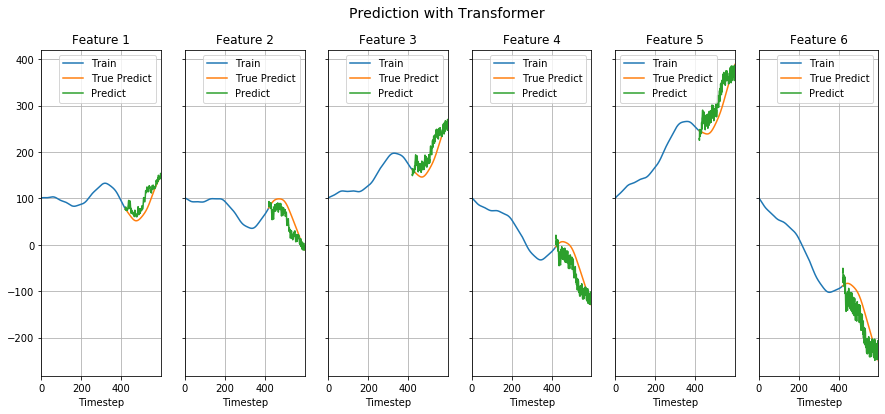

In [6]:
# plot
from plot.plot_helper_functions import plot_features_with_prediction

pred_vec = prediction_features
true_ = data[num_train_data_points:]

fig = plot_features_with_prediction(
    data=data[:num_train_data_points],
    prediction=pred_vec,
    true_predictions=true_,
    use_true_predictions=True,
    save_path_and_name="foo.pdf",
    params={"fig_title":"Prediction with Transformer"}
)

In [2]:
featrue_dim = 6
num_data_points = 600
num_train_data_points = int(num_data_points*0.7)
look_back = 150
data = np.array([[(-1)**i*(j/10)*(i+np.cos(j/10)) + 100 for i in range(featrue_dim)] for j in range(num_data_points)])

transformer_model = Transformer_prediction_model(data, params={"look_back": look_back, "forecast_window": int(0.3*num_data_points)})

Data shape with extra features:  (600, 12)


In [3]:

best_model = transformer_model.transformer(epochs=50, path_to_save_model="./deep_transformer/res/", path_to_save_loss="./deep_transformer/res/", device="cpu")

Epoch: 0 , Training Loss: 0.006047360014515576
Epoch: 1 , Training Loss: 0.0011672513773768659
Epoch: 2 , Training Loss: 0.0007399272150709145
Epoch: 3 , Training Loss: 0.0014428531729435456
Epoch: 4 , Training Loss: 0.0017497482423307624
Epoch: 5 , Training Loss: 0.0013714342050232774
Epoch: 6 , Training Loss: 0.0012512348403813304
Epoch: 7 , Training Loss: 0.002216306404209829
Epoch: 8 , Training Loss: 0.0017230227586274211
Epoch: 9 , Training Loss: 0.0012140861184574787
Epoch: 10 , Training Loss: 0.000840623316452877
Epoch: 11 , Training Loss: 0.0007649012124125851
Epoch: 12 , Training Loss: 0.0005479209314421397
Epoch: 13 , Training Loss: 0.0002115050653425383
Epoch: 14 , Training Loss: 0.0008713912839180132
Epoch: 15 , Training Loss: 0.0006878461940563424
Epoch: 16 , Training Loss: 0.0002166067092427865
Epoch: 17 , Training Loss: 6.863420533190085e-05
Epoch: 18 , Training Loss: 6.289349012256806e-05
Epoch: 19 , Training Loss: 5.179297946988679e-05
Epoch: 20 , Training Loss: 4.6557

(180, 6)
(180, 6)


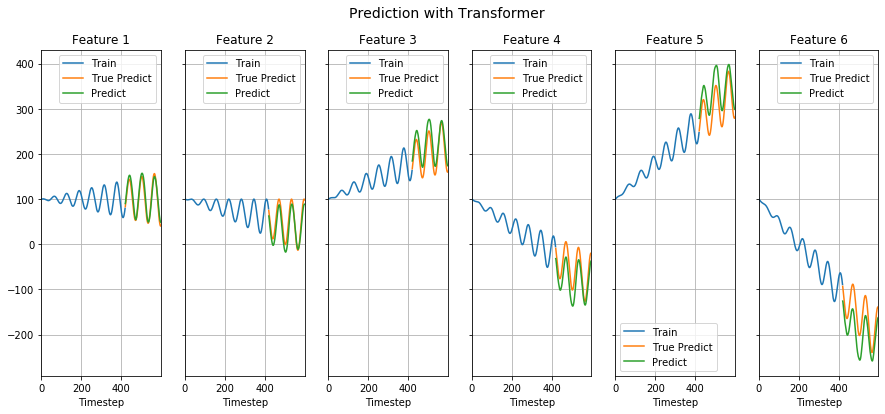

In [6]:
# make predictions
prediction_features, in_sample_errors = transformer_model.inference(path_to_save_model="./deep_transformer/res/", best_model=best_model)
print(prediction_features.shape)
# plot
from plot.plot_helper_functions import plot_features_with_prediction

pred_vec = prediction_features
true_ = data[num_train_data_points:]

boot_strap_errors = in_sample_errors[np.random.randint(low=0, high=in_sample_errors.shape[0], size=pred_vec.shape[0]),:]
print(boot_strap_errors.shape)

fig = plot_features_with_prediction(
    data=data[:num_train_data_points],
    prediction=pred_vec+boot_strap_errors,
    true_predictions=true_,
    use_true_predictions=True,
    save_path_and_name="prediction_with_transformer_d2.pdf",
    params={"fig_title":"Prediction with Transformer"}
)

In [5]:
print(np.max(in_sample_errors))

0.12839045045292047
